In [1]:
import pandas as pd
import numpy as np
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import tqdm
from tqdm import tqdm

In [2]:
df_train = pd.read_csv('../bd/train.csv')
df_train.columns = [x.lower() for x in df_train.columns]
print(df_train.shape)
df_train.head(2)

(891, 12)


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


/Users/andyvillanuevamartinez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

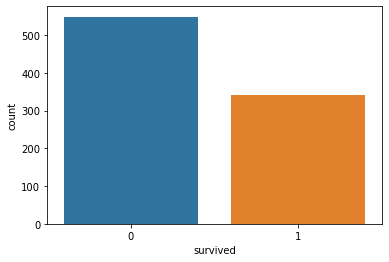

In [3]:
sns.countplot(df_train.survived)

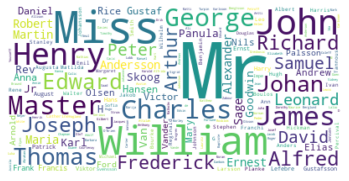

In [4]:
# wordcloud name
text = " ".join(x for x in df_train[df_train['survived']==0]['name'])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear', cmap = 'gray')
plt.axis("off")
plt.show()

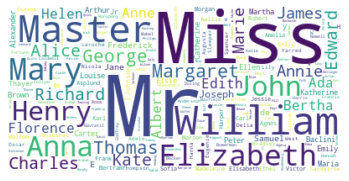

In [5]:
# wordcloud name
text = " ".join(x for x in df_train[df_train['survived']==1]['name'])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear', cmap = 'gray')
plt.axis("off")
plt.show()

In [6]:
df_train['title'] = df_train['name'].apply(lambda x: x.split('.')[0].split(',')[1].strip())
df_train['title'] = np.where(df_train['title'].isin(['Mr','Miss','Mrs']),df_train['title'],'Otro')

In [7]:
df_train.groupby('title')['survived'].value_counts(1)

title  survived
Miss   1           0.697802
       0           0.302198
Mr     0           0.843327
       1           0.156673
Mrs    1           0.792000
       0           0.208000
Otro   1           0.522388
       0           0.477612
Name: survived, dtype: float64

In [8]:
#report = sv.compare(df_train[df_train['survived']==1].drop(columns = ['passengerid','name','ticket','cabin']),
#                    df_train[df_train['survived']==0].drop(columns = ['passengerid','name','ticket','cabin']))
#report.show_html('../objects/report_titanic.html')

In [9]:
df_train.head(2)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
 12  title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [11]:
df_train.drop(columns = ['ticket','cabin','name'], inplace = True)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   title        891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [13]:
df_train.head(2)

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked,title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs


In [14]:
df_train.dtypes

passengerid      int64
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
title           object
dtype: object

In [15]:
def data_type(df0, no_considerar = []):
    df = df0.copy()
    for col in tqdm([x for x in df.columns if x not in no_considerar]):
        if len(set(df[col]))<=20:
            df[col] = df[col].astype(str)
        else:
            df[col] = df[col].astype(float)
    return df

In [16]:
df_train = data_type(df_train, no_considerar = ['passengerid'])

100%|██████████| 9/9 [00:00<00:00, 1202.42it/s]


In [17]:
df_train.dtypes

passengerid      int64
survived        object
pclass          object
sex             object
age            float64
sibsp           object
parch           object
fare           float64
embarked        object
title           object
dtype: object

In [18]:
df_train.head(2)

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked,title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs


In [19]:
from sklearn.model_selection import train_test_split 

In [20]:
X = df_train.drop(columns = ['passengerid','survived'])
y = df_train['survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 16)

In [22]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median'))
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OrdinalEncoder())
])

In [24]:
num_attr = df_train.select_dtypes(include = ['float64','int64']).drop(columns = ['passengerid']).columns
cat_attr = df_train.select_dtypes(include = ['object']).drop(columns = ['survived']).columns

In [25]:
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_attr),
    ('cat', cat_transformer, cat_attr)
])

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [28]:
rf_model = pipeline.fit(X_train, y_train)

In [29]:
print(rf_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['age', 'fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'title'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])


In [30]:
from sklearn.metrics import accuracy_score, roc_auc_score
y_pred = rf_model.predict(X_test)
predicted_prob = rf_model.predict_proba(X_test)[:,1]
accuracy_score(y_test, y_pred), roc_auc_score(y_test, predicted_prob)

(0.7653631284916201, 0.8234034267912773)

In [31]:
import shap

In [43]:
explainer = shap.TreeExplainer(rf_model[1])

In [46]:
rf_model.predict(X_test)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['age', 'fare'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'title'], dtype='object'))])

In [45]:
shap_values = explainer.shap_values(X_test, approximate = False, check_additivity = False)

shap.summary_plot(shap_values[1], samples)

ValueError: could not convert string to float: 'female'

In [105]:
X_train_proc = preprocessor.fit_transform(X_train)

In [108]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_proc, y_train)

RandomForestClassifier()

In [110]:
print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['age', 'fare'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'title'], dtype='object'))])


In [113]:
from sklearn.metrics import accuracy_score, roc_auc_score
X_test_proc = preprocessor.fit_transform(X_test)
y_pred = rf_model.predict(X_test_proc)
predicted_prob = rf_model.predict_proba(X_test_proc)[:,1]
accuracy_score(y_test, y_pred), roc_auc_score(y_test, predicted_prob)

(0.7653631284916201, 0.8185358255451713)

In [103]:
import shap

In [114]:
explainer = shap.TreeExplainer(rf_model)

In [47]:
#clf.named_steps['preprocessor'].transformers_[1][1]\
#   .named_steps['onehot'].get_feature_names(categorical_features)
#
#clf['preprocessor'].transformers_[1][1]\
#    ['onehot'].get_feature_names(categorical_features)

In [138]:
preprocessor.transformers_[1][1]['encoder'].categories_#.get_feature_names()

#clf['preprocessor'].transformers_[1][1]\
#    ['encoder'].get_feature_names(categorical_features)

[array(['1', '2', '3'], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['0', '1', '2', '3', '4', '5', '8'], dtype=object),
 array(['0', '1', '2', '3', '5'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array(['Miss', 'Mr', 'Mrs', 'Otro'], dtype=object)]

In [163]:
encoding = preprocessor.transformers_[1][1]['encoder'].categories_
encoding_class = dict(zip((encoding[0]), range(len(encoding[0]))))
encoding_class

{'1': 0, '2': 1, '3': 2}

In [164]:
encoding = preprocessor.transformers_[1][1]['encoder'].categories_
encoding_feature = lambda x: dict(zip(x, range(len(x))))
encoding_full = [encoding_feature(feature_elem) for feature_elem in encoding]
print(encoding_full)

[{'1': 0, '2': 1, '3': 2}, {'female': 0, 'male': 1}, {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '8': 6}, {'0': 0, '1': 1, '2': 2, '3': 3, '5': 4}, {'C': 0, 'Q': 1, 'S': 2}, {'Miss': 0, 'Mr': 1, 'Mrs': 2, 'Otro': 3}]


In [165]:
encoding_full

[{'1': 0, '2': 1, '3': 2},
 {'female': 0, 'male': 1},
 {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '8': 6},
 {'0': 0, '1': 1, '2': 2, '3': 3, '5': 4},
 {'C': 0, 'Q': 1, 'S': 2},
 {'Miss': 0, 'Mr': 1, 'Mrs': 2, 'Otro': 3}]

In [144]:
X_test.head(3)

,pclass,sex,age,sibsp,parch,fare,embarked,title
506,2,female,33.0,0,2,26.00,S,Mrs
298,1,male,NaN,0,0,30.50,S,Mr
338,3,male,45.0,0,0,8.05,S,Mr


In [145]:
X_test_proc[:3]#age, fare, pclass, sex, sibsp, parch, embarked, tittle

array([[33.  , 26.  ,  1.  ,  0.  ,  0.  ,  2.  ,  2.  ,  2.  ],
       [27.  , 30.5 ,  0.  ,  1.  ,  0.  ,  0.  ,  2.  ,  1.  ],
       [45.  ,  8.05,  2.  ,  1.  ,  0.  ,  0.  ,  2.  ,  1.  ]])

In [146]:
df_test = pd.DataFrame(X_test_proc, columns = ['age', 'fare', 'pclass', 'sex', 'sibsp', 'parch', 'embarked', 'tittle'])

In [147]:
df_test.head(3)

,age,fare,pclass,sex,sibsp,parch,embarked,tittle
0,33.0,26.00,1.0,0.0,0.0,2.0,2.0,2.0
1,27.0,30.50,0.0,1.0,0.0,0.0,2.0,1.0
2,45.0,8.05,2.0,1.0,0.0,0.0,2.0,1.0


In [149]:
df_test[df_test.index == 0]

,age,fare,pclass,sex,sibsp,parch,embarked,tittle
0,33.0,26.0,1.0,0.0,0.0,2.0,2.0,2.0


In [153]:
y_pred

array(['1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1',
       '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1',
       '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1',
       '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1',
       '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1',
       '1', '0', '1', '0', '1', '0', '0', '1', '0', '1'], dtype=

In [150]:
# Calculate Shap values
choosen_instance = df_test[df_test.index == 0]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [110]:
print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['age', 'fare'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'title'], dtype='object'))])


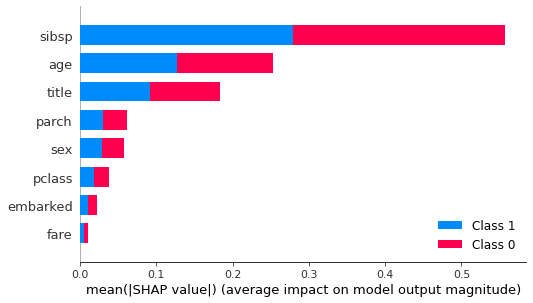

In [155]:
shap.summary_plot(shap_values, X_test)

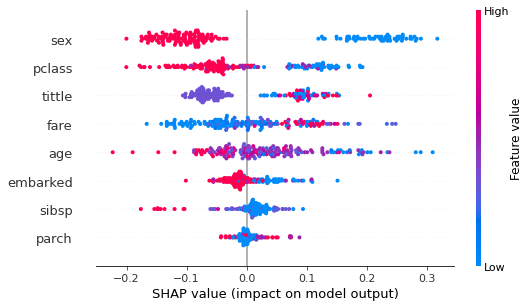

In [160]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(df_test, approximate=False, check_additivity=False)

shap.summary_plot(shap_values[1], samples)

In [166]:
encoding_full

[{'1': 0, '2': 1, '3': 2},
 {'female': 0, 'male': 1},
 {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '8': 6},
 {'0': 0, '1': 1, '2': 2, '3': 3, '5': 4},
 {'C': 0, 'Q': 1, 'S': 2},
 {'Miss': 0, 'Mr': 1, 'Mrs': 2, 'Otro': 3}]